## **E-Commerce Marketing Insights**

### **Business Context**:
One of the leading E-Commerce Company would like to get marketing insights from the data to 
define marketing strategies going forward. Also, expecting to build an analytical dashboard to 
monitor various KPI’s & business metrics.

### **Available Data**

Transaction data has been provided for the period of 1st Jan 2019 to 31st Dec 2019. The following datasets have been provided:

##### **Online_Sales.csv**
This file contains actual orders data (point of Sales data) at the transaction level with the following variables:

- **CustomerID:** Customer unique ID
- **Transaction_ID:** Transaction Unique ID
- **Transaction_Date:** Date of Transaction
- **Product_SKU:** SKU ID – Unique ID for the product
- **Product_Description:** Product Description
- **Product_Category:** Product Category
- **Quantity:** Number of items ordered
- **Avg_Price:** Price per one quantity
- **Delivery_Charges:** Charges for delivery
- **Coupon_Status:** Any discount coupon applied

##### **Customers_Data.csv**
This file contains customer’s demographics.

- **CustomerID:** Customer Unique ID
- **Gender:** Gender of the customer
- **Location:** Location of the Customer
- **Tenure_Months:** Tenure in Months

##### **Discount_Coupon.csv**
Discount coupons have been given for different categories in different months.

- **Month:** Discount coupon applied in that month
- **Product_Category:** Product category
- **Coupon_Code:** Coupon Code for the given Category and given month
- **Discount_pct:** Discount Percentage for the given coupon

##### **Marketing_Spend.csv**
Marketing spend on both offline & online channels on a daily basis.

- **Date:** Date
- **Offline_Spend:** Marketing spend on offline channels like TV, Radio, Newspapers, Hoardings, etc.
- **Online_Spend:** Marketing spend on online channels like Google keywords, Facebook, etc.

##### **Tax_Amount.csv**
GST Details for a given category.

- **Product_Category:** Product Category
- **GST:** Percentage of GST.


____________________________

#### **Import required libraries and packages**

In [1]:
# import libraries
import pandas as pd 
# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### **Reading the Data and Preprocessing** 

In [2]:
# online sales data 
online_sales = pd.read_csv('Datasets/Online_Sales.csv')
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used


In [3]:
# customer demographics 
customer_df = pd.read_excel('Datasets/CustomersData.xlsx')
customer_df.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
# monthly discount on product categories 
discount_df = pd.read_csv('Datasets/Discount_Coupon.csv')
discount_df.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [5]:
# marketing expenses  (daily)
marketing_df = pd.read_csv('Datasets/Marketing_Spend.csv')
marketing_df.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [6]:
# GST for each product category
tax_df = pd.read_excel('Datasets/Tax_amount.xlsx')
tax_df.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


cleaning feature names for convinience 

In [7]:
def clean_column_names(dataframe):
    """
    Clean column names by removing whitespaces and converting to lowercase.
    
    Parameters:
    - dataframe: pandas DataFrame
    
    Returns:
    - pandas DataFrame with cleaned column names
    """
    # Replace whitespaces with underscores and convert to lowercase
    dataframe.columns = dataframe.columns.str.replace(' ', '').str.lower()

    return dataframe

In [8]:
# clean the feature names 
dfs = [online_sales, discount_df, tax_df, customer_df]
for df in dfs:
    clean_column_names(df)

In [9]:
# convert 'transaction_date' column to  proper date time format. 
online_sales['transaction_date'] = pd.to_datetime(online_sales['transaction_date'], format='%Y%m%d')
# create 'transaction_month" feature 
online_sales['month'] = online_sales['transaction_date'].dt.strftime('%b')

online_sales.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan


Merge  relevent dataframes 

In [10]:
# Merge relevant datasets
merged_df = pd.merge(online_sales, customer_df, on='customerid', how='left')
merged_df= pd.merge(merged_df, tax_df, on='product_category', how='left')
online_sales_df = pd.merge(merged_df, discount_df, on=['month','product_category'], how='left')

In [11]:
# first 5 samples of final df 
online_sales_df.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month,gender,location,tenure_months,gst,coupon_code,discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,10.00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,10.00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,0.10,OFF10,10.00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,0.18,SALE10,10.00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,0.18,AIO10,10.00


In [12]:
# rename 'customerid' to 'customer_id' 
online_sales_df.rename(columns={'customerid' : 'customer_id'}, inplace=True)

In [13]:
# check for missing values 
online_sales_df.isna().sum()

customer_id              0
transaction_id           0
transaction_date         0
product_sku              0
product_description      0
product_category         0
quantity                 0
avg_price                0
delivery_charges         0
coupon_status            0
month                    0
gender                   0
location                 0
tenure_months            0
gst                      0
coupon_code            400
discount_pct           400
dtype: int64

Some product categories have no discount thats why we can see missing values in `coupen_code` and `discount_pct`. We need to replace them by `None` and `0` for further data analysis and calculation of KPI.

In [14]:
# product categories without discount
no_discount_categories =list(set(online_sales['product_category'].unique()) - set(discount_df['product_category'].unique()))
print(f"Product categories without discount : {no_discount_categories}")

Product categories without discount : ['Google', 'Fun', 'More Bags', 'Backpacks']


In [15]:
# replace missing 'coupen_code' as 'NONE'
online_sales_df['coupon_code'].fillna('NONE', inplace=True)
# replace missing 'discount_pct' as 0
online_sales_df['discount_pct'].fillna(0, inplace=True)

In [114]:
# save to csv file 
online_sales_df.to_csv('online_sales_final.csv', index_label=False)

____________________________

### **Business Objectives**

#### **1.Calculate Invoice amount or sale_amount or revenue for each transaction and item level**

The Invoice Value can be calculated using the formula:

```python
Invoice Value = ((quantity * avg_price) * (1 - discount_pct) * (1 + gst)) + delivery_charges


In [16]:
# discount percentage in decimals for calculations 
online_sales_df['discount_pct'] = online_sales_df['discount_pct'] / 100

In [17]:
# create a new feature 'invoice_value' using above formula
online_sales_df['invoice_value'] = (
    (online_sales_df['quantity'] * online_sales_df['avg_price']) *
    (1 - online_sales_df['discount_pct']) * (1 + online_sales_df['gst']) +
    online_sales_df['delivery_charges']
)

In [18]:
# check the dataframe 
online_sales_df.head()

,customer_id,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month,gender,location,tenure_months,gst,coupon_code,discount_pct,invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,0.10,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,0.10,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,0.10,OFF10,0.10,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,0.18,SALE10,0.10,99.58
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,0.18,AIO10,0.10,24.02


__________________________________________

#### **2. Exploratory Data Analysis**

##### **a. Customers aquired every month** 

In [19]:
# identify first purchase date for each customer.
first_purchase_date = online_sales_df.groupby('customer_id')['transaction_date'].min().reset_index()
first_purchase_date.rename(columns={'transaction_date':'first_purchase_date'}, inplace=True)

# merge it with the main dataframe 
online_sales_df = pd.merge(online_sales_df, first_purchase_date, on='customer_id', how='left')

# filter for new customers 
new_customers_per_month = online_sales_df[online_sales_df['transaction_date'] == online_sales_df['first_purchase_date']]
# group by month and count unique customers. 
new_customers_per_month = new_customers_per_month.groupby('month')['customer_id'].nunique().reset_index()

# rename column as 'customers_acquired'
new_customers_per_month.rename(columns={'customer_id':'customers_acquired'}, inplace=True)

# sort the months in order 
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
new_customers_per_month['month'] = pd.Categorical(new_customers_per_month['month'], categories=months_order, ordered=True)
new_customers_per_month = new_customers_per_month.sort_values('month').reset_index(drop=True)

# result: Number of new customers acquired every month 
print(new_customers_per_month)


   month  customers_acquired
0    Jan                 215
1    Feb                  96
2    Mar                 177
3    Apr                 163
4    May                 112
5    Jun                 137
6    Jul                  94
7    Aug                 135
8    Sep                  78
9    Oct                  87
10   Nov                  68
11   Dec                 106


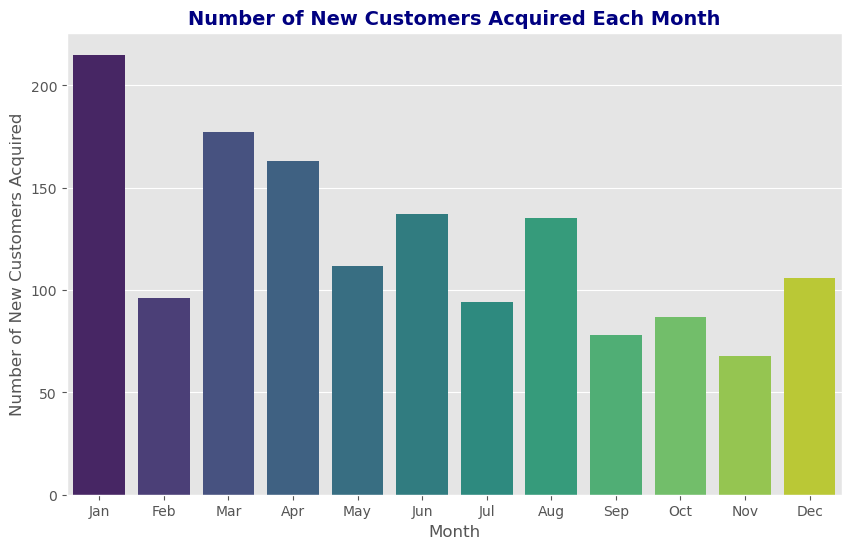

In [20]:
# visualize it using a bar graph 
# Plot the bar chart with colored bars
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='customers_acquired', data=new_customers_per_month, palette='viridis')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of New Customers Acquired')
plt.title('Number of New Customers Acquired Each Month', weight='bold', color='#000080', fontsize=14)

# Show the plot
plt.show()

We can notice that in first quarter of the year 2019  there is highest number of new customers aquired while the last quarter its lower. 

________________________

##### **b. Understand the retention of customers on month on month basis**


To calculate customer retention rate on monthly basis first we have to calcualte total number of unique customers in the given month and then calculate repeat customers. 
using the formula below we will calculate the customer retention rate for each month. 

```python
retention_rate = (repeat_customers_per_month['repeat_customers'] / total_customers_per_month['total_customers']) * 100


   month  total_customers  retention_rate_perc
4    Jan              215                90.70
3    Feb              109                96.33
7    Mar              208                92.79
0    Apr              224                89.29
8    May              200                86.50
6    Jun              259                90.73
5    Jul              236                85.17
1    Aug              300                92.33
11   Sep              193                90.67
10   Oct              210                89.52
9    Nov              188                90.96
2    Dec              236                94.49


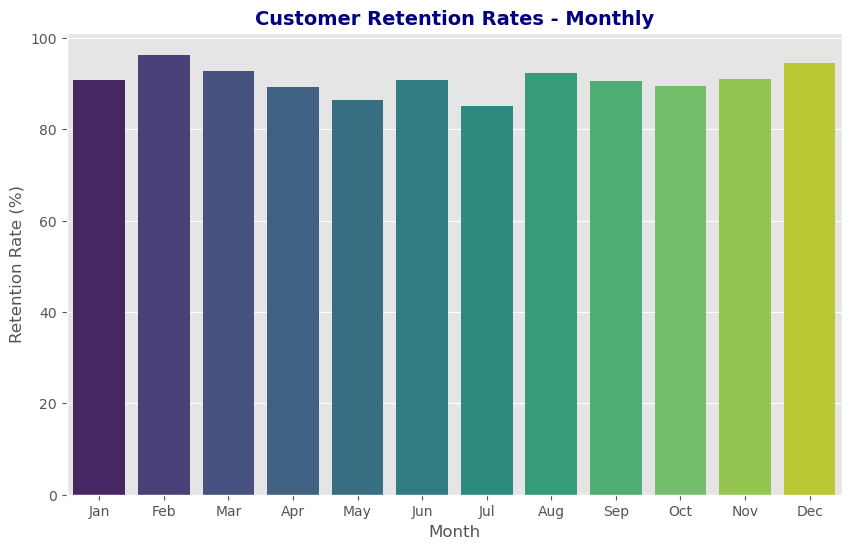

In [21]:
# Create a DataFrame to store monthly customer counts
monthly_customer_counts = online_sales_df.groupby(['month', 'customer_id']).size().reset_index(name='purchase_count')

# Identify customers with more than one purchase
repeat_customers = monthly_customer_counts[monthly_customer_counts['purchase_count'] > 1]

# Calculate the total number of unique customers in each month
total_customers_per_month = monthly_customer_counts.groupby('month')['customer_id'].nunique().reset_index(name='total_customers')

# Calculate the number of repeat customers in each month
repeat_customers_per_month = repeat_customers.groupby('month')['customer_id'].nunique().reset_index(name='repeat_customers')

# Ensure that 'month' is a categorical variable with the correct order
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
total_customers_per_month['month'] = pd.Categorical(total_customers_per_month['month'], categories=months_order, ordered=True)

# Calculate the retention rate
total_customers_per_month['retention_rate_perc'] = (repeat_customers_per_month['repeat_customers'] / total_customers_per_month['total_customers']) * 100

# print the resulting dataframe with retention rates
print(total_customers_per_month.sort_values('month'))

# Plotting the retention rates
plt.figure(figsize=(10, 6))
sns.barplot(data=total_customers_per_month, x='month', y='retention_rate_perc', palette='viridis')
plt.title('Customer Retention Rates - Monthly', weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.show()

_______________________

##### **c. How the revenues from existing/new customers on month on month basis**

In [22]:
online_sales_df.head()

,customer_id,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month,gender,location,tenure_months,gst,coupon_code,discount_pct,invoice_value,first_purchase_date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,0.10,158.67,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,0.10,158.67,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,0.10,OFF10,0.10,8.53,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,0.18,SALE10,0.10,99.58,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,0.18,AIO10,0.10,24.02,2019-01-01


Identify and categorise customers as existing or new based on `first_purchase_date`.

In [23]:
# identify existing and new customers
online_sales_df['customer_type'] = 'Existing'
online_sales_df.loc[online_sales_df['month']==online_sales_df['first_purchase_date'].dt.strftime('%b'), 'customer_type'] = 'New'

Monthly revenue analysis from existing and new customers 

In [24]:
# group by month and customer type
monthly_revenue = online_sales_df.groupby(['month', 'customer_type'])['invoice_value'].sum().reset_index()
monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=months_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')

# pivot the data for better visualization 
monthly_revenue_pivot = monthly_revenue.pivot(index='month',
                                              columns='customer_type',
                                              values='invoice_value').fillna(0)

# display pivot tables 
monthly_revenue_pivot

customer_type,Existing,New
month,,
Jan,0.00,463883.06
Feb,41053.62,286842.94
Mar,57181.71,279623.50
Apr,183188.12,264811.07
May,115067.71,203488.59
Jun,116949.71,172880.62
Jul,254868.58,169113.77
Aug,217630.90,200529.67
Sep,188985.50,132142.86


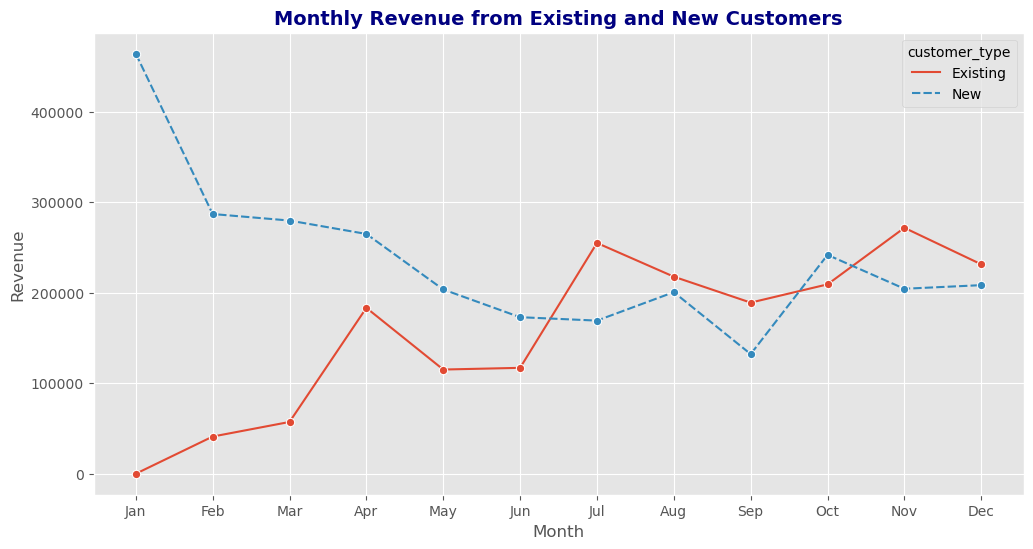

In [25]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue_pivot, marker='o')
plt.title('Monthly Revenue from Existing and New Customers', weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

During the initial six months, there is a noteworthy surge in revenue attributed to new customers, surpassing that of existing customers. However, as the year progresses into its latter half, the disparity diminishes, and the revenue generated from existing customers exhibits a modest but discernible increase, ultimately surpassing that of new customers. This shift highlights a dynamic landscape in customer engagement, with new customer acquisition playing a more substantial role in the earlier months, while existing customer relationships contribute increasingly to the overall revenue in the latter half of the year.

___________________________________

##### **d. How the discounts playing role in the revenues?**

**summery statistics of `discount_pct` and `invoice_value`**

In [26]:
online_sales_df[['discount_pct','quantity', 'invoice_value']].describe()

,discount_pct,quantity,invoice_value
count,52924.00,52924.00,52924.00
mean,0.20,4.50,89.08
std,0.08,20.10,152.51
min,0.00,1.00,4.38
25%,0.10,1.00,18.55
50%,0.20,1.00,40.68
75%,0.30,2.00,123.45
max,0.30,900.00,8979.27


**correlation analysis of `discount_pct` and `invoice_value`**

In [27]:
corrleation = online_sales_df[['discount_pct', 'invoice_value']].corr()
corrleation

,discount_pct,invoice_value
discount_pct,1.00,-0.06
invoice_value,-0.06,1.00


The weak correlation suggests that there is not a strong linear relationship between the discount percentage and the invoice value. In other words, knowing the discount percentage alone may not be a good predictor of the invoice value.

**Discount distribution**

Frequency distribution of discount percentages. 

In [28]:
# value count of discount_pct
online_sales_df['discount_pct'].value_counts()

0.20    17830
0.10    17470
0.30    17224
0.00      400
Name: discount_pct, dtype: int64

**Total revenue for each Discount percentages** 

In [29]:
# group by discount_pct and add the invoice values.
discount_pct_revenue = online_sales_df.groupby(['discount_pct'])['invoice_value'].sum().reset_index()
# Convert y-axis ticks to millions
discount_pct_revenue['invoice_value_millions'] = discount_pct_revenue['invoice_value'] / 1e6
discount_pct_revenue

,discount_pct,invoice_value,invoice_value_millions
0,0.00,36949.34,0.04
1,0.10,1770784.74,1.77
2,0.20,1529150.01,1.53
3,0.30,1377627.47,1.38


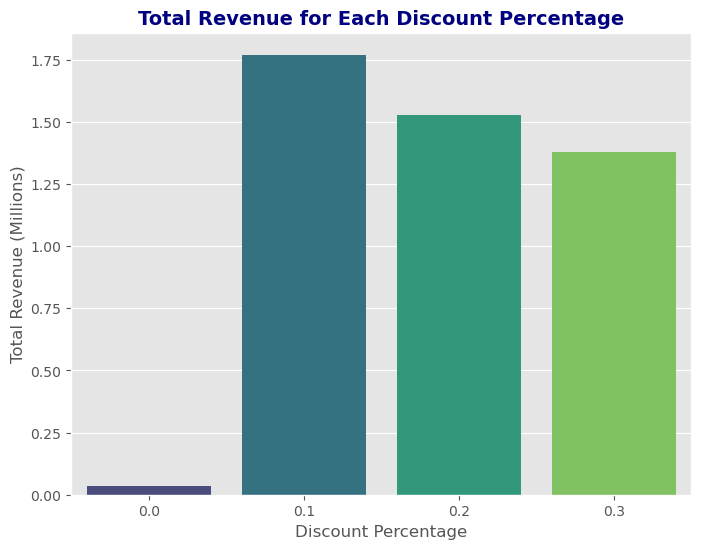

In [30]:
# Convert y-axis ticks to millions
discount_pct_revenue['invoice_value_millions'] = discount_pct_revenue['invoice_value'] / 1e6

# Bar plot of discount percentage vs. total revenue
plt.figure(figsize=(8, 6))
sns.barplot(x='discount_pct', y='invoice_value_millions', data=discount_pct_revenue, palette='viridis')
plt.title('Total Revenue for Each Discount Percentage',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Discount Percentage')
plt.ylabel('Total Revenue (Millions)')
plt.show()

We can notice that product categories with  10% discount rate has generated more revenue. 

____________________________________

##### **e. Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc**

- **Revenue by category**

In [31]:
revenue_by_category = online_sales_df.groupby('product_category')['invoice_value'].sum().reset_index()
# color palette from seaborn
cm = sns.dark_palette("teal", as_cmap=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue by product category:")
revenue_by_category.style.background_gradient(cmap=cm)



Revenue by product category:


,product_category,invoice_value
0,Accessories,9277.125900
1,Android,986.049400
2,Apparel,735450.436340
3,Backpacks,10812.879000
4,Bags,168853.063140
5,Bottles,9309.917050
6,Drinkware,240267.752580
7,Fun,8994.541800
8,Gift Cards,17574.807600
9,Google,13168.807000


We can notice that  product category `Nest-USA` has highest revenue generated while `Android` generated lowest. 

- **Revenue generated by month**

In [32]:
# group by month and add the invoice value
revenue_by_month = online_sales_df.groupby('month')['invoice_value'].sum().reset_index()
# Correcting the order of the 'month' column
revenue_by_month['month']= pd.Categorical(revenue_by_month['month'], categories=months_order, ordered=True)
# sorting month in correct order
revenue_by_month.sort_values('month', inplace=True)
revenue_by_month.reset_index(drop=True, inplace=True)
# color palette from seaborn
cm = sns.dark_palette("teal", as_cmap=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue generated by month:")
revenue_by_month.style.background_gradient(cmap=cm)


Revenue generated by month:


,month,invoice_value
0,Jan,463883.057050
1,Feb,327896.560200
2,Mar,336805.203830
3,Apr,447999.195230
4,May,318556.300560
5,Jun,289830.329310
6,Jul,423982.343610
7,Aug,418160.567040
8,Sep,321128.356380
9,Oct,450837.462550


November has highest revenue while June has lowest. 

- **Revenue by week**

In [33]:
# create a 'week' feature from transaction date
revenue_data = online_sales_df[['transaction_date', 'invoice_value', 'location']]
revenue_data['week'] = revenue_data['transaction_date'].dt.isocalendar().week

# group by week 
revenue_by_week = revenue_data.groupby('week')['invoice_value'].sum().reset_index()
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue generated by week:")
revenue_by_week.style.background_gradient(cmap=cm)



Revenue generated by week:


,week,invoice_value
0,1,119476.365610
1,2,98081.415640
2,3,100403.601430
3,4,103231.578700
4,5,96555.274410
5,6,78196.226160
6,7,87244.718360
7,8,86611.157360
8,9,70089.670110
9,10,76487.700500


- **Revenue by day of the week**

In [34]:
# create a 'day' feature from transaction date
revenue_data['day_of_week'] = revenue_data['transaction_date'].dt.day_name()

# group by day
revenue_by_day = revenue_data.groupby('day_of_week')['invoice_value'].sum().reset_index()
# Create a new column 'day_of_week' with ordered days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day['day_of_week'] = pd.Categorical(revenue_by_day['day_of_week'], categories=day_order, ordered=True)
revenue_by_day.sort_values('day_of_week', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue generated by day of the week:")
revenue_by_day.style.background_gradient(cmap=cm)



Revenue generated by day of the week:


,day_of_week,invoice_value
1,Monday,356667.463300
5,Tuesday,393222.750630
6,Wednesday,836607.544020
4,Thursday,855069.378650
0,Friday,872214.300680
2,Saturday,692889.264710
3,Sunday,707840.857280


Revenue generated on Monday is lowest while Friday is highest. 

- **Revenue by day of month**

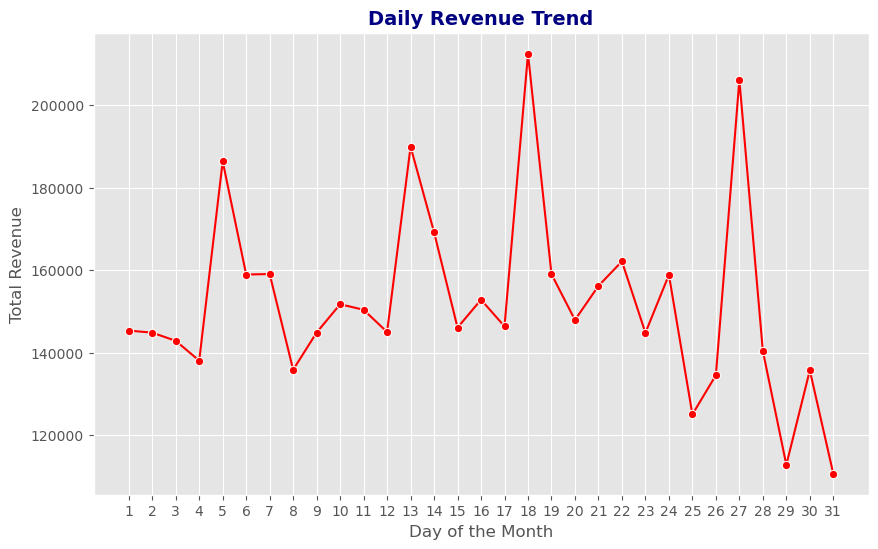

In [35]:
# create a 'day' feature from transaction date
revenue_data['day'] = revenue_data['transaction_date'].dt.day

# group by day
revenue_by_day = revenue_data.groupby('day')['invoice_value'].sum().reset_index()

# Plot a line chart to visualise variation in revenue generated 
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='invoice_value', data=revenue_by_day, marker='o', color='r')
plt.title('Daily Revenue Trend',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Day of the Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 32))
plt.show()

- **Revenue by Location**

In [36]:
# group by location
revenue_by_location = revenue_data.groupby('location')['invoice_value'].sum().reset_index()
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue generated by location:")
revenue_by_location


Revenue generated by location:


,location,invoice_value
0,California,1455051.30
1,Chicago,1638484.37
2,New Jersey,407934.20
3,New York,955138.02
4,Washington DC,257903.67


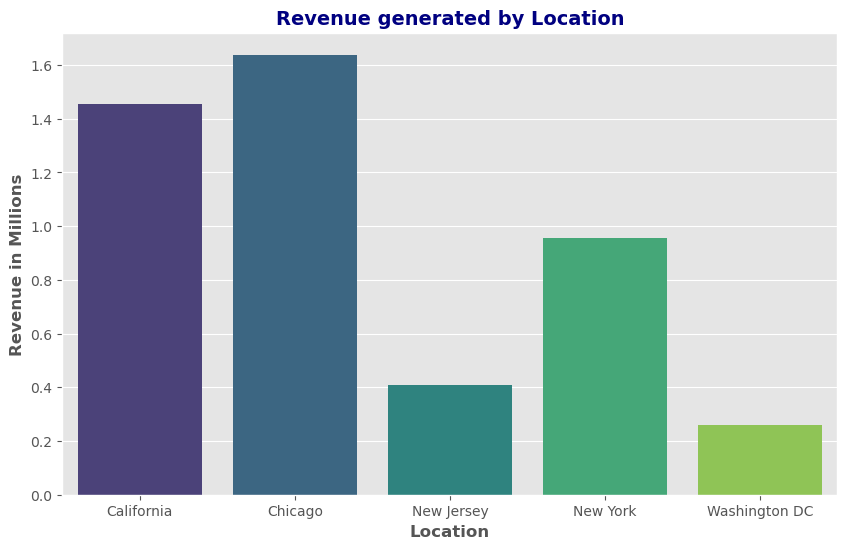

In [37]:
# convert the values to millions for better interpretation on bar graph
revenue_by_location['revenue_in_millions'] = revenue_by_location['invoice_value'] / 1e6
# Plot the bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='revenue_in_millions', data=revenue_by_location, palette='viridis')

# Add labels and title
plt.xlabel('Location', weight='bold')
plt.ylabel('Revenue in Millions', weight='bold')
plt.title('Revenue generated by Location', weight='bold', color='#000080', fontsize=14)

# Show the plot
plt.show()

- **Number of orders by category, month, week, day of week , day of month, location**

In [38]:
# filter relevent data for analysis 
order_data = online_sales_df[['transaction_id', 'transaction_date', 'product_category', 'month', 'location']]

In [39]:
# number of order by category 
orders_by_category = order_data.groupby('product_category')['transaction_id'].nunique().reset_index(name='number_of_orders')
# color palette from seaborn
cm = sns.dark_palette("teal", as_cmap=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nNumber of order by product category :")
orders_by_category.style.background_gradient(cmap=cm)


Number of order by product category :


,product_category,number_of_orders
0,Accessories,191
1,Android,43
2,Apparel,8129
3,Backpacks,84
4,Bags,1545
5,Bottles,258
6,Drinkware,2524
7,Fun,146
8,Gift Cards,157
9,Google,105


In [40]:
# create week columns 
order_data['week'] = order_data['transaction_date'].dt.isocalendar().week
# group by week 
orders_by_week = order_data.groupby('week')['transaction_id'].nunique().reset_index(name='number_of_orders')
# Visualizing the DataFrame with set precision and background gradient
print("\nNumber of orders by week:")
orders_by_week.style.background_gradient(cmap=cm)



Number of orders by week:


,week,number_of_orders
0,1,573
1,2,428
2,3,466
3,4,461
4,5,463
5,6,403
6,7,454
7,8,405
8,9,407
9,10,478


In [41]:
# create a 'day' feature from transaction date
order_data['day_of_week'] = order_data['transaction_date'].dt.day_name()
# group by day
orders_by_day = order_data.groupby('day_of_week')['transaction_id'].nunique().reset_index(name='number_of_orders')
# Create a new column 'day_of_week' with ordered days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day['day_of_week'] = pd.Categorical(orders_by_day['day_of_week'], categories=day_order, ordered=True)
orders_by_day.sort_values('day_of_week', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue generated by day of the week:")
orders_by_day.style.background_gradient(cmap=cm)


Revenue generated by day of the week:


,day_of_week,number_of_orders
1,Monday,2130
5,Tuesday,2315
6,Wednesday,4378
4,Thursday,4278
0,Friday,4233
2,Saturday,3872
3,Sunday,3855


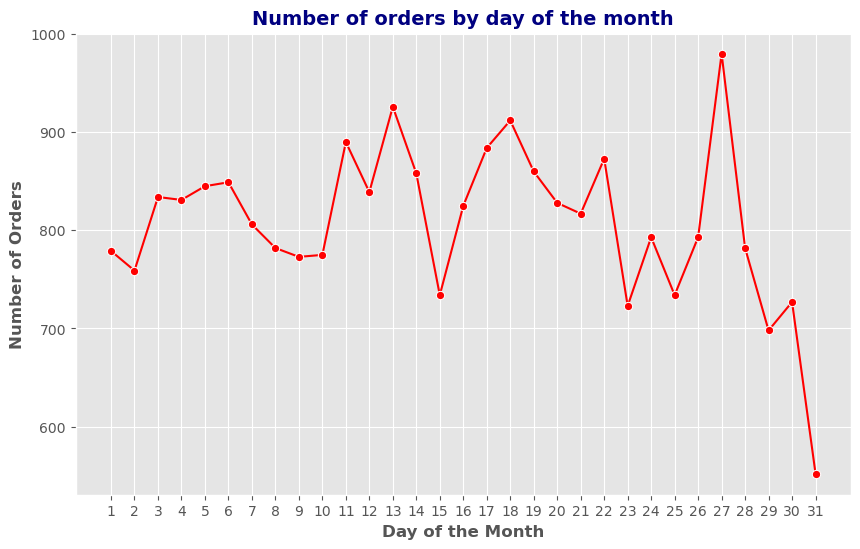

In [42]:
# create a day of the month  feature from transaction date
order_data['day'] = order_data['transaction_date'].dt.day
# group by day
orders_by_day = order_data.groupby('day')['transaction_id'].nunique().reset_index(name='number_of_orders')
# Plot a line chart to visualise variation in revenue generated 
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='number_of_orders', data=orders_by_day, marker='o', color='r')
plt.title('Number of orders by day of the month',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Day of the Month', weight='bold')
plt.ylabel('Number of Orders', weight='bold')
plt.xticks(range(1, 32))
plt.show()

In [43]:
# group by location
orders_by_location = order_data.groupby('location')['transaction_id'].nunique().reset_index(name='number_of_orders')
# Visualizing the DataFrame with set precision and background gradient
print("\nNumber of orders by location:")
orders_by_location


Number of orders by location:


,location,number_of_orders
0,California,7890
1,Chicago,9090
2,New Jersey,2269
3,New York,5499
4,Washington DC,1410


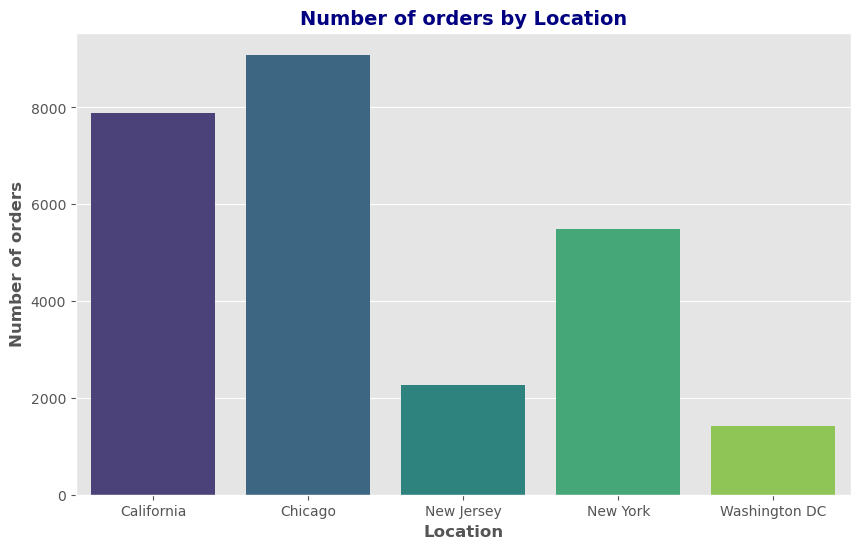

In [44]:
# Plot the bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='number_of_orders', data=orders_by_location, palette='viridis')
# Add labels and title
plt.xlabel('Location', weight='bold')
plt.ylabel('Number of orders', weight='bold')
plt.title('Number of orders by Location', weight='bold', color='#000080', fontsize=14)
# Show the plot
plt.show()

- **Average order value by category, month, week, day of week , day of month, location**

In [45]:
# filter relevent data for analysis 
order_value_data = online_sales_df[['transaction_date', 'product_category', 'month', 'location', 'invoice_value']]

In [46]:
# avergae order value by category

avg_value_by_category = order_value_data.groupby('product_category')['invoice_value'].mean().reset_index(name='avg_order_value')
# color palette from seaborn
cm = sns.dark_palette("teal", as_cmap=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nAverage Order Value by Product category:")
avg_value_by_category.style.background_gradient(cmap=cm)


Average Order Value by Product category:


,product_category,avg_order_value
0,Accessories,39.645837
1,Android,22.931381
2,Apparel,40.574337
3,Backpacks,121.493022
4,Bags,89.720012
5,Bottles,34.738496
6,Drinkware,68.982990
7,Fun,56.215886
8,Gift Cards,110.533381
9,Google,125.417210


In [47]:
# avg order value by month 

# group by month and add the invoice value
avg_value_by_month = online_sales_df.groupby('month')['invoice_value'].mean().reset_index(name='avg_order_value')
# Correcting the order of the 'month' column
avg_value_by_month['month']= pd.Categorical(avg_value_by_month['month'], categories=months_order, ordered=True)
# sorting month in correct order
avg_value_by_month.sort_values('month', inplace=True)
# color palette from seaborn
cm = sns.dark_palette("teal", as_cmap=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nAverage Order Value by month:")
avg_value_by_month.style.background_gradient(cmap=cm)



Average Order Value by month:


,month,avg_order_value
4,Jan,114.172547
3,Feb,99.846699
7,Mar,77.497746
0,Apr,107.951613
8,May,69.675481
6,Jun,69.122425
5,Jul,80.743162
1,Aug,67.993588
11,Sep,74.890008
10,Oct,108.270284


In [48]:
# average order value by week of the year. 

# create  'week' column deriving from 'transaction_date'
order_value_data['week'] = order_value_data['transaction_date'].dt.isocalendar().week

# Group by week and calculate average order value
avg_value_by_week = order_value_data.groupby('week')['invoice_value'].mean().reset_index(name='avg_order_value')

# Visualizing the DataFrame with set precision and background gradient
cm = sns.dark_palette("teal", as_cmap=True)
styled_avg_value_by_week = avg_value_by_week.style.background_gradient(cmap=cm)
print("\nAverage order value by week:")
styled_avg_value_by_week


Average order value by week:


,week,avg_order_value
0,1,113.140498
1,2,118.312926
2,3,119.244182
3,4,109.471451
4,5,104.271355
5,6,104.400836
6,7,99.029192
7,8,98.871184
8,9,86.530457
9,10,75.580732


In [49]:
# average order value by day of the week 

# create a 'day' feature from transaction date
order_value_data['day_of_week'] = order_value_data['transaction_date'].dt.day_name()

# group by day
avg_value_by_day = order_value_data.groupby('day_of_week')['invoice_value'].mean().reset_index(name='avg_order_value')
# Create a new column 'day_of_week' with ordered days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_value_by_day['day_of_week'] = pd.Categorical(avg_value_by_day['day_of_week'], categories=day_order, ordered=True)
avg_value_by_day.sort_values('day_of_week', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nAverage order value by day of the week:")
avg_value_by_day.style.background_gradient(cmap=cm)


Average order value by day of the week:


,day_of_week,avg_order_value
1,Monday,79.898625
5,Tuesday,85.279278
6,Wednesday,94.138353
4,Thursday,95.007709
0,Friday,94.130617
2,Saturday,84.736366
3,Sunday,83.089665


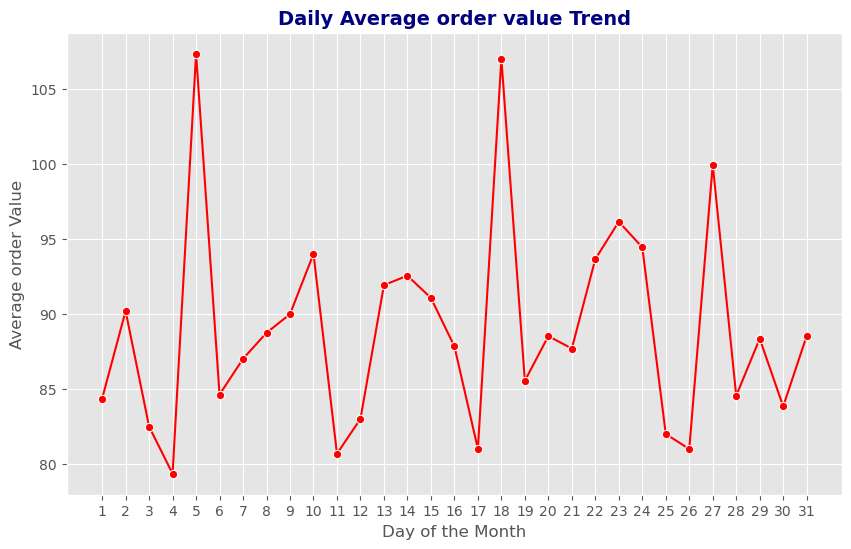

In [50]:
# average order value by day of the month

# create a 'day' feature from transaction date
order_value_data['day'] = order_value_data['transaction_date'].dt.day

# group by day
avg_order_value_by_day = order_value_data.groupby('day')['invoice_value'].mean().reset_index(name='avg_order_value')

# Plot a line chart to visualise variation in revenue generated 
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='avg_order_value', data=avg_order_value_by_day, marker='o', color='r')
plt.title('Daily Average order value Trend',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Day of the Month')
plt.ylabel('Average order Value')
plt.xticks(range(1, 32))
plt.show()


In [51]:
# average order value by location 

# group by location
avg_value_location = order_value_data.groupby('location')['invoice_value'].mean().reset_index(name='avg_order_value')
# Visualizing the DataFrame with set precision and background gradient
print("\nAverage order value by location:")
avg_value_location


Average order value by location:


,location,avg_order_value
0,California,90.17
1,Chicago,89.14
2,New Jersey,90.59
3,New York,85.49
4,Washington DC,94.40


- **Number of customers by category, month, week, day of week , day of month, location**

In [52]:
# filter relevent data for analysis
customers_data = online_sales_df[['transaction_date',  'product_category', 'month', 'gender', 'location', 'customer_type']]

In [53]:
# extract date related information
customers_data['week'] = customers_data['transaction_date'].dt.isocalendar().week
customers_data['day_name'] = customers_data['transaction_date'].dt.day_name()
customers_data['day_of_month'] =  customers_data['transaction_date'].dt.day

In [54]:
# Analyzing number of customers by category and customer type
customers_by_category = customers_data.groupby(['product_category', 'customer_type']).size().unstack(fill_value=0)
# color palette from seaborn
cm = sns.dark_palette("teal", as_cmap=True)
print("Customers by Category:")
customers_by_category.style.background_gradient(cmap=cm)

Customers by Category:


customer_type,Existing,New
product_category,,
Accessories,117,117
Android,16,27
Apparel,7348,10778
Backpacks,41,48
Bags,711,1171
Bottles,115,153
Drinkware,1263,2220
Fun,62,98
Gift Cards,70,89


In [55]:
# Analyzing number of customers by month and customer type
customers_by_month = customers_data.groupby(['month', 'customer_type']).size().unstack(fill_value=0)
# Correcting the order of the 'month' column
customers_by_month.index = pd.Categorical(customers_by_month.index, categories=months_order, ordered=True)
# sorting month in correct order
customers_by_month.sort_index(inplace=True)
customers_by_month.rename_axis('month', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nCustomers by month:")
customers_by_month.style.background_gradient(cmap=cm)


Customers by month:


customer_type,Existing,New
month,,
Jan,0,4063
Feb,437,2847
Mar,763,3583
Apr,1300,2850
May,1552,3020
Jun,1732,2461
Jul,3150,2101
Aug,2995,3155
Sep,2446,1842


In [56]:
# Analyzing number of customers by day of the week and customer type
customers_by_day = customers_data.groupby(['day_name', 'customer_type']).size().unstack(fill_value=0)
# ordering and sorting the days.
customers_by_day.index = pd.Categorical(customers_by_day.index, categories=day_order, ordered=True)
customers_by_day.sort_index(inplace=True)
customers_by_day.rename_axis('Day', inplace=True)
# disaplay the result
print("Customers by day of Week:")
customers_by_day.style.background_gradient(cmap=cm)

Customers by day of Week:


customer_type,Existing,New
Day,,
Monday,1718,2746
Tuesday,1611,3000
Wednesday,4147,4740
Thursday,3445,5555
Friday,3681,5585
Saturday,3305,4872
Sunday,2984,5535


In [57]:
# Analyzing number of customers by day of the month and customer type
customers_by_day = customers_data.groupby(['day_of_month', 'customer_type']).size().unstack(fill_value=0)
# disaplay the result
print("Customers by day of Month:")
customers_by_day.style.background_gradient(cmap=cm)

Customers by day of Month:


customer_type,Existing,New
day_of_month,,
1,721,1002
2,550,1056
3,396,1336
4,690,1050
5,701,1035
6,522,1356
7,782,1046
8,584,947
9,458,1152


In [58]:
# Analyzing number of customers by location and customer type
customers_by_location = customers_data.groupby(['location', 'customer_type']).size().unstack(fill_value=0)
# disaplay the result
print("Customers by location :")
customers_by_location.style.background_gradient(cmap=cm)

Customers by location :


customer_type,Existing,New
location,,
California,6415,9721
Chicago,7855,10525
New Jersey,1748,2755
New York,3832,7341
Washington DC,1041,1691


- **Order quantity by category, month, week, day of week , day of month, location**

In [59]:
# relevant data for analysis 
qty_data = order_data[['product_category', 'month', 'location', 'day_of_week', 'day']]
qty_data['quantity'] = online_sales_df['quantity']
qty_data['week'] = order_data['transaction_date'].dt.weekofyear

In [60]:
# Qunatity by category 
qty_by_category = qty_data.groupby('product_category')['quantity'].sum().reset_index()
# Visualizing the DataFrame with set precision and background gradient
print("\nquantity by product category:")
qty_by_category.style.background_gradient(cmap=cm)



quantity by product category:


,product_category,quantity
0,Accessories,1097
1,Android,45
2,Apparel,32438
3,Backpacks,113
4,Bags,15273
5,Bottles,2090
6,Drinkware,30501
7,Fun,834
8,Gift Cards,206
9,Google,575


In [61]:
# Qunatity by month 
qty_by_month = qty_data.groupby('month')['quantity'].sum().reset_index()
# Correcting the order of the 'month' column
qty_by_month['month']= pd.Categorical(qty_by_month['month'], categories=months_order, ordered=True)
# sorting month in correct order
qty_by_month.sort_values('month', inplace=True)
qty_by_month.reset_index(drop=True, inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nQuantity by Month:")
qty_by_month.style.background_gradient(cmap=cm)


Quantity by Month:


,month,quantity
0,Jan,20140
1,Feb,16575
2,Mar,20787
3,Apr,25277
4,May,18715
5,Jun,21619
6,Jul,22898
7,Aug,27457
8,Sep,19353
9,Oct,17425


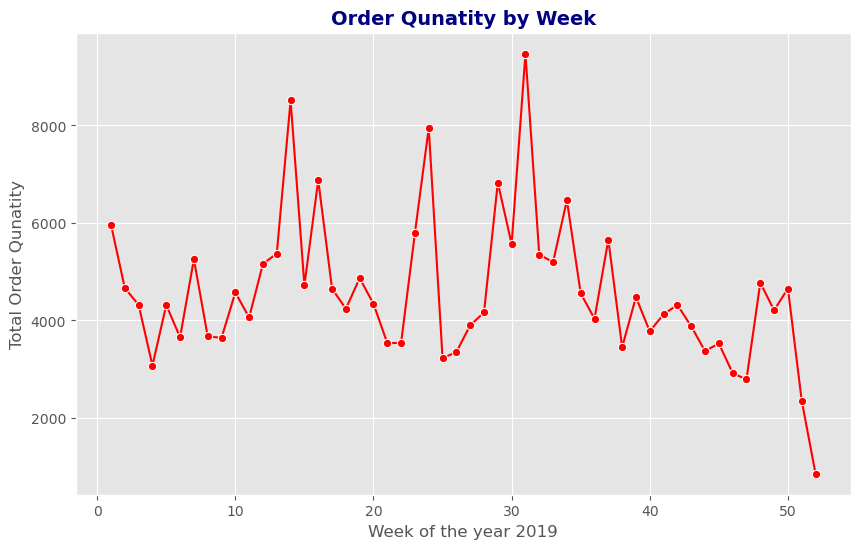

In [62]:

# order qunatity by week 
# group by week 
qty_by_week = qty_data.groupby('week')['quantity'].sum().reset_index()
# Convert data types if needed
qty_by_week['week'] = pd.to_numeric(qty_by_week['week'])
qty_by_week['quantity'] = pd.to_numeric(qty_by_week['quantity'])

# Plot a line chart to visualise variation in revenue generated 
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='quantity', data=qty_by_week, marker='o', color='r')
plt.title('Order Qunatity by Week',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Week of the year 2019')
plt.ylabel('Total Order Qunatity')
plt.show()


In [63]:
# order quantity by day of the week 

# group by day
qty_by_day_of_week = qty_data.groupby('day_of_week')['quantity'].sum().reset_index()
# sort 'day_of_week' with ordered days
qty_by_day_of_week['day_of_week'] = pd.Categorical(qty_by_day_of_week['day_of_week'], categories=day_order, ordered=True)
qty_by_day_of_week.sort_values('day_of_week', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nOrder quantity  by day of the week:")
qty_by_day_of_week.style.background_gradient(cmap=cm)


Order quantity  by day of the week:


,day_of_week,quantity
1,Monday,11983
5,Tuesday,11317
6,Wednesday,39797
4,Thursday,44482
0,Friday,52433
2,Saturday,37965
3,Sunday,40056


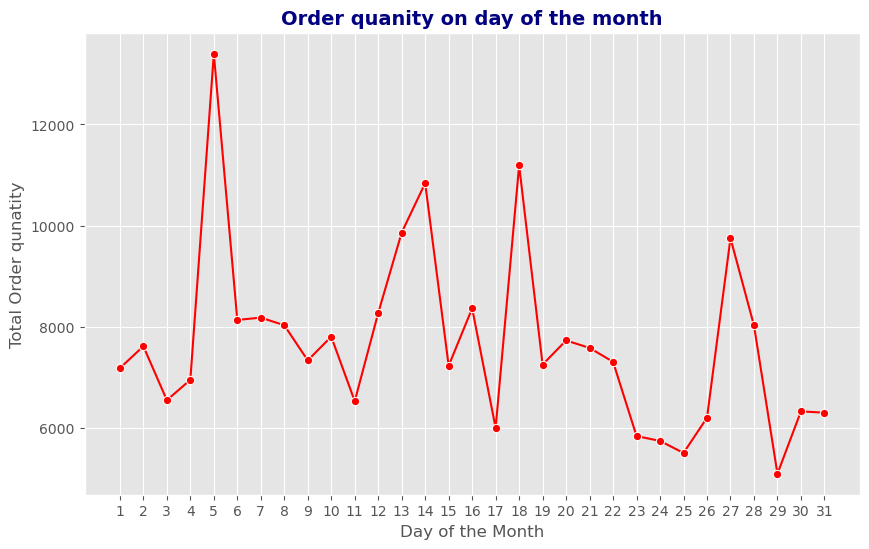

In [64]:
# order qunatity by day of the month 

# group by day
qty_by_day = qty_data.groupby('day')['quantity'].sum().reset_index()

# Plot a line chart to visualise variation in revenue generated 
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='quantity', data=qty_by_day, marker='o', color='r')
plt.title('Order quanity on day of the month',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Day of the Month')
plt.ylabel('Total Order qunatity')
plt.xticks(range(1, 32))
plt.show()

In [65]:
# order qunatity by location 

# group by location
qty_by_location = qty_data.groupby('location')['quantity'].sum().reset_index()
# Visualizing the DataFrame with set precision and background gradient
print("\n Quntity by location:")
qty_by_location.style.background_gradient(cmap=cm)


 Quntity by location:


,location,quantity
0,California,72577
1,Chicago,83969
2,New Jersey,22677
3,New York,46507
4,Washington DC,12303


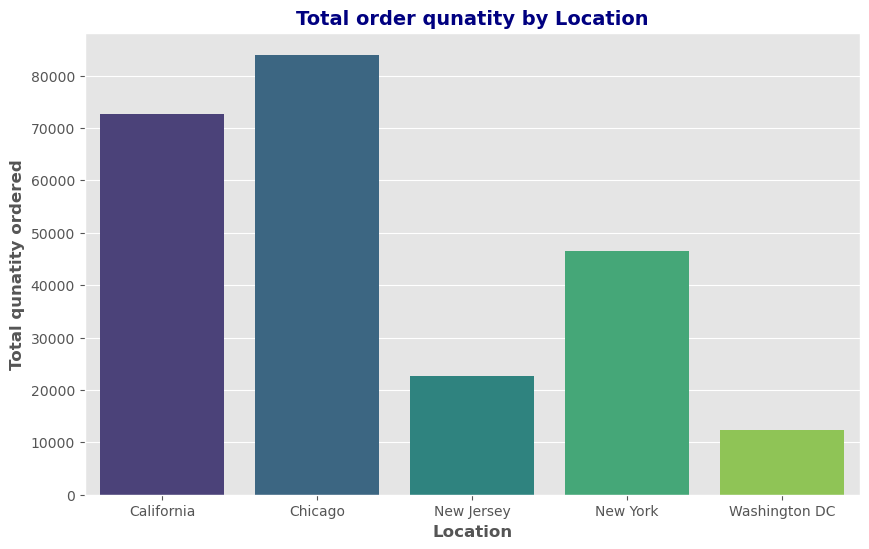

In [66]:
# Plot the bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='quantity', data=qty_by_location, palette='viridis')

# Add labels and title
plt.xlabel('Location', weight='bold')
plt.ylabel('Total qunatity ordered', weight='bold')
plt.title('Total order qunatity by Location', weight='bold', color='#000080', fontsize=14)
# Show the plot
plt.show()

- **Understand the trends/seasonality of sales by category, location, gender etc…**

**Seasonality of sales by category**

In [67]:
category_seasonality = online_sales_df.groupby(['month', 'product_category'])['invoice_value'].sum().unstack(fill_value=0)
category_seasonality.index = pd.Categorical(category_seasonality.index, categories=months_order, ordered=True)
# sorting month in correct order
category_seasonality.sort_index(inplace=True)
category_seasonality.rename_axis('month', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nSeasonality of sales by Product Category:")
category_seasonality.style.background_gradient(cmap=cm)


Seasonality of sales by Product Category:


product_category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
month,,,,,,,,,,,,,,,,,,,,
Jan,57.554300,99.497600,56205.713940,336.029000,14642.225060,1048.128500,19916.103580,450.332800,268.087050,1314.954000,2706.587800,1585.175840,10240.735220,1694.708800,0.000000,9912.008900,292057.099200,7493.629300,42836.665000,1017.821160
Feb,0.000000,24.091200,49088.494960,662.214000,21111.635200,508.441200,18913.033680,513.516400,336.000000,1843.491000,4487.803200,163.061040,12111.291760,546.671600,0.000000,3693.590000,179919.167200,5978.690800,27312.840800,682.526160
Mar,52.692300,215.556100,65829.510520,802.213000,15191.076900,571.800300,24945.033200,1015.019400,275.625000,3342.675000,3058.831650,853.144000,10611.407580,721.325000,0.000000,6106.380000,161977.150000,4653.629400,35315.092400,1267.042080
Apr,190.290400,52.580200,107452.974680,1292.944000,13840.201860,718.225000,32391.036660,2972.610200,685.125000,1241.062000,12236.047000,179.446000,12599.708220,518.194000,0.000000,5799.690000,187293.960000,23037.232950,44511.496200,986.370860
May,174.033200,110.916000,71011.269600,1702.996000,11111.892560,1334.595600,18910.112000,930.842800,1113.000000,1792.279000,3114.912400,584.064000,7814.261440,492.213400,0.000000,3524.730000,159457.900000,5832.839200,28713.429600,830.013760
Jun,215.942100,186.363000,52375.174260,366.676000,12031.187620,650.078250,17235.305040,970.497600,882.000000,1367.905000,1440.186350,410.556000,7684.809880,0.000000,0.000000,7494.940000,158088.320000,4300.717550,23433.542400,696.128260
Jul,1960.206400,162.750900,87393.682000,853.892000,14655.596620,1530.779700,16287.614560,1390.708000,472.500000,1953.536000,2988.914250,1492.504800,14306.001780,0.000000,0.000000,7931.040000,214855.850000,23874.519900,31472.534400,399.712300
Aug,351.290800,134.294400,74859.332320,1708.515000,17826.140400,697.190800,27239.489440,439.975200,630.000000,312.905000,19331.358400,1069.426000,12096.061600,0.000000,17964.560000,4564.800000,180390.370000,26773.286400,30784.285200,987.286080
Sep,1202.884800,0.000000,59692.925780,820.073000,9556.862100,1651.871450,19079.501680,260.061400,441.000000,0.000000,1245.816800,35.456000,9402.808060,0.000000,53624.160000,2786.230000,136737.940000,6590.913850,17286.190200,713.661260


plot seasonality of sales by category

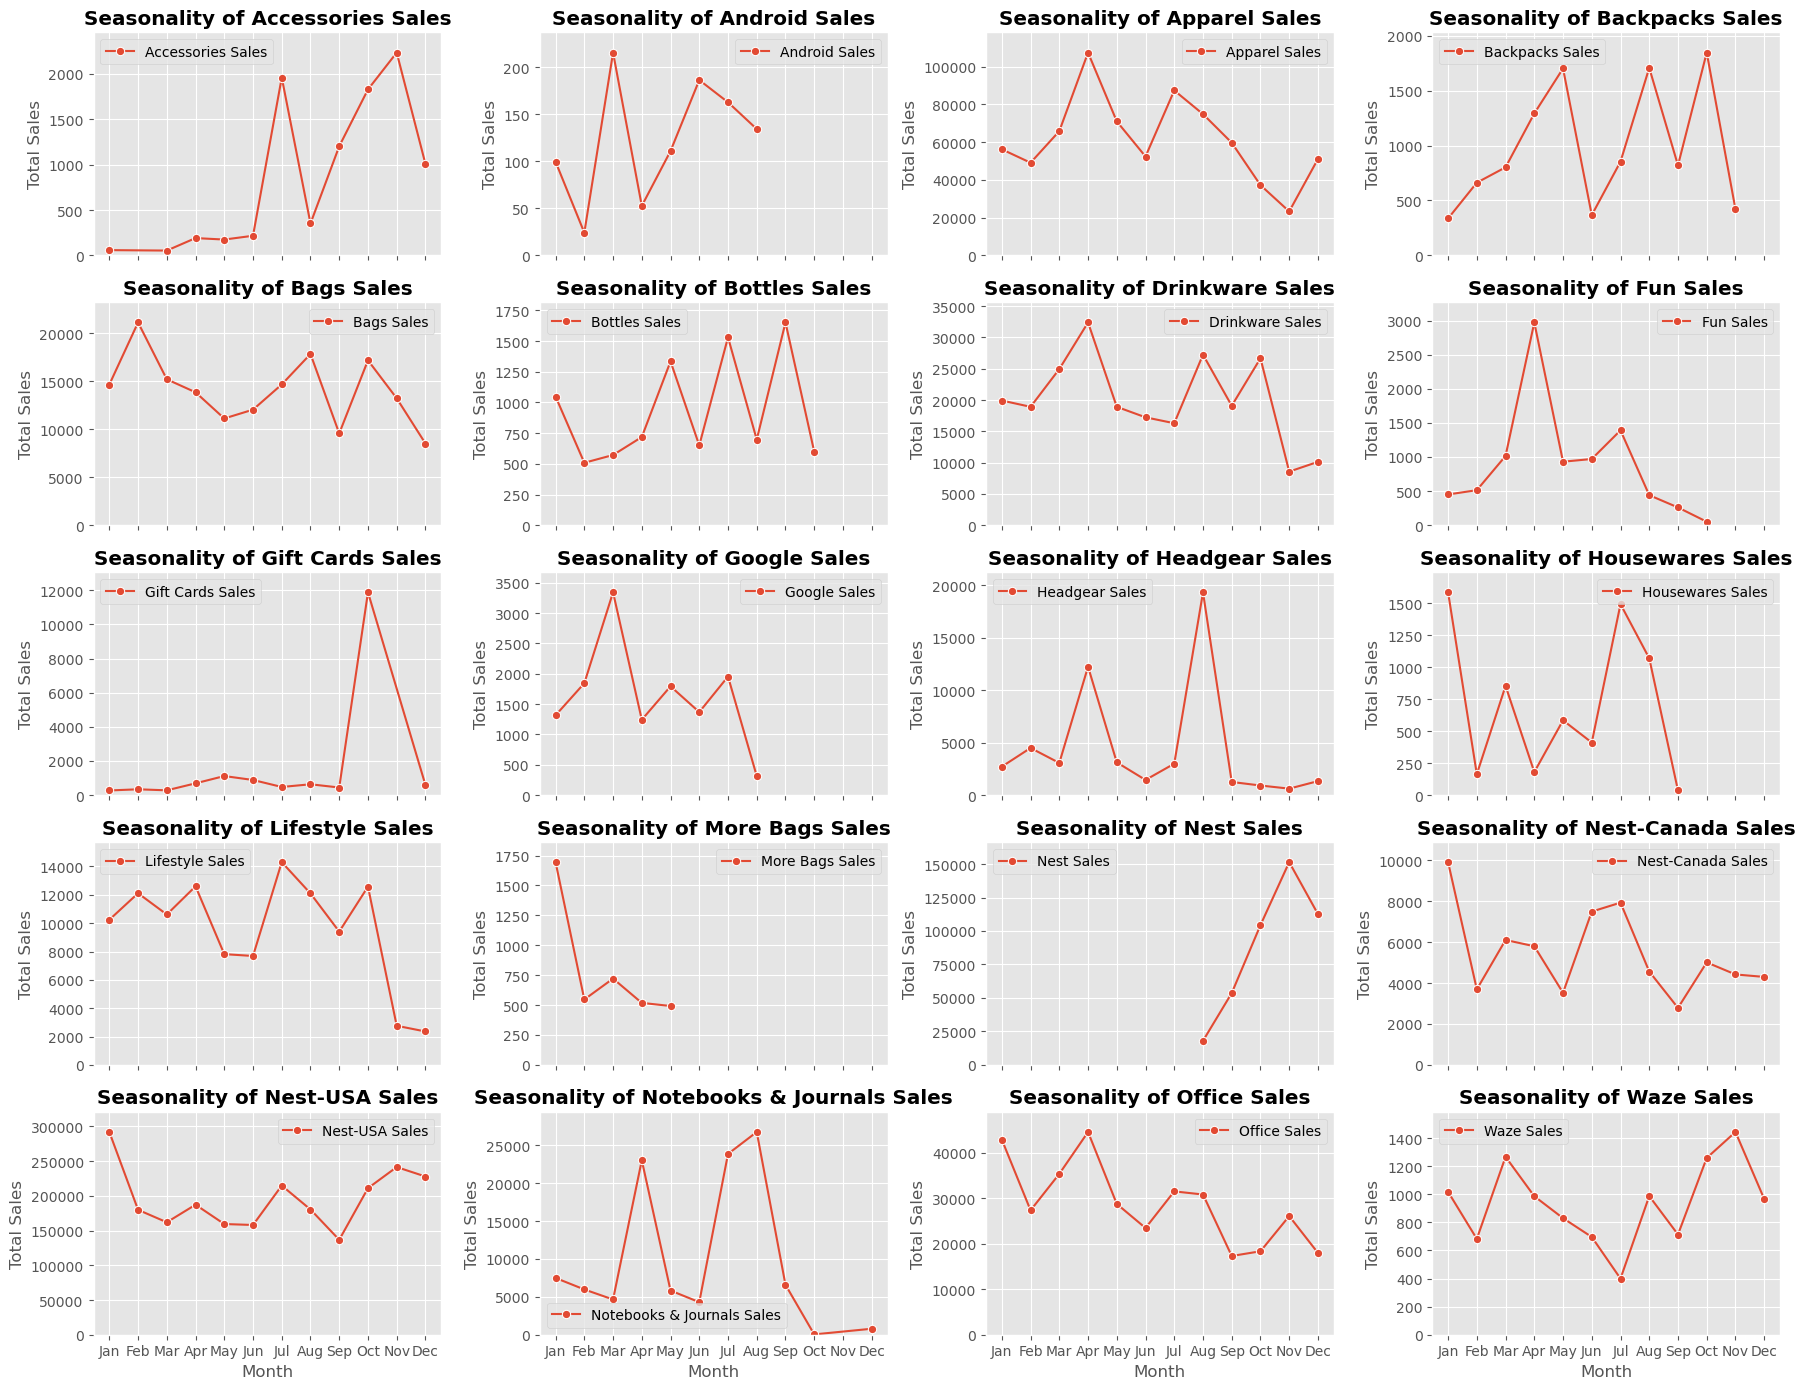

In [68]:
# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(18, 14), sharex=True)  # Don't share y-axis
# month order
months_order = online_sales_df['month'].unique()
# Flatten the axes for easy iteration
axes = axes.flatten()

# Group by category and plot each category on a separate subplot
for i, (category, data) in enumerate(online_sales_df.groupby('product_category')):
    ax = axes[i]
    category_seasonality = data.groupby(['month'])['invoice_value'].sum().reindex(months_order).reset_index()
    category_seasonality.rename_axis('month', inplace=True)

    # Using Seaborn's lineplot
    sns.lineplot(x='month', y='invoice_value', data=category_seasonality, marker='o', label=f'{category} Sales', ax=ax, sort=False)

    ax.set_title(f'Seasonality of {category} Sales', weight='bold')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')

    # Set y-axis limits based on the maximum invoice value for the current category
    ax.set_ylim(0, category_seasonality['invoice_value'].max() * 1.1)  # You can adjust the multiplier as needed

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Heatmap of Seasonality by category

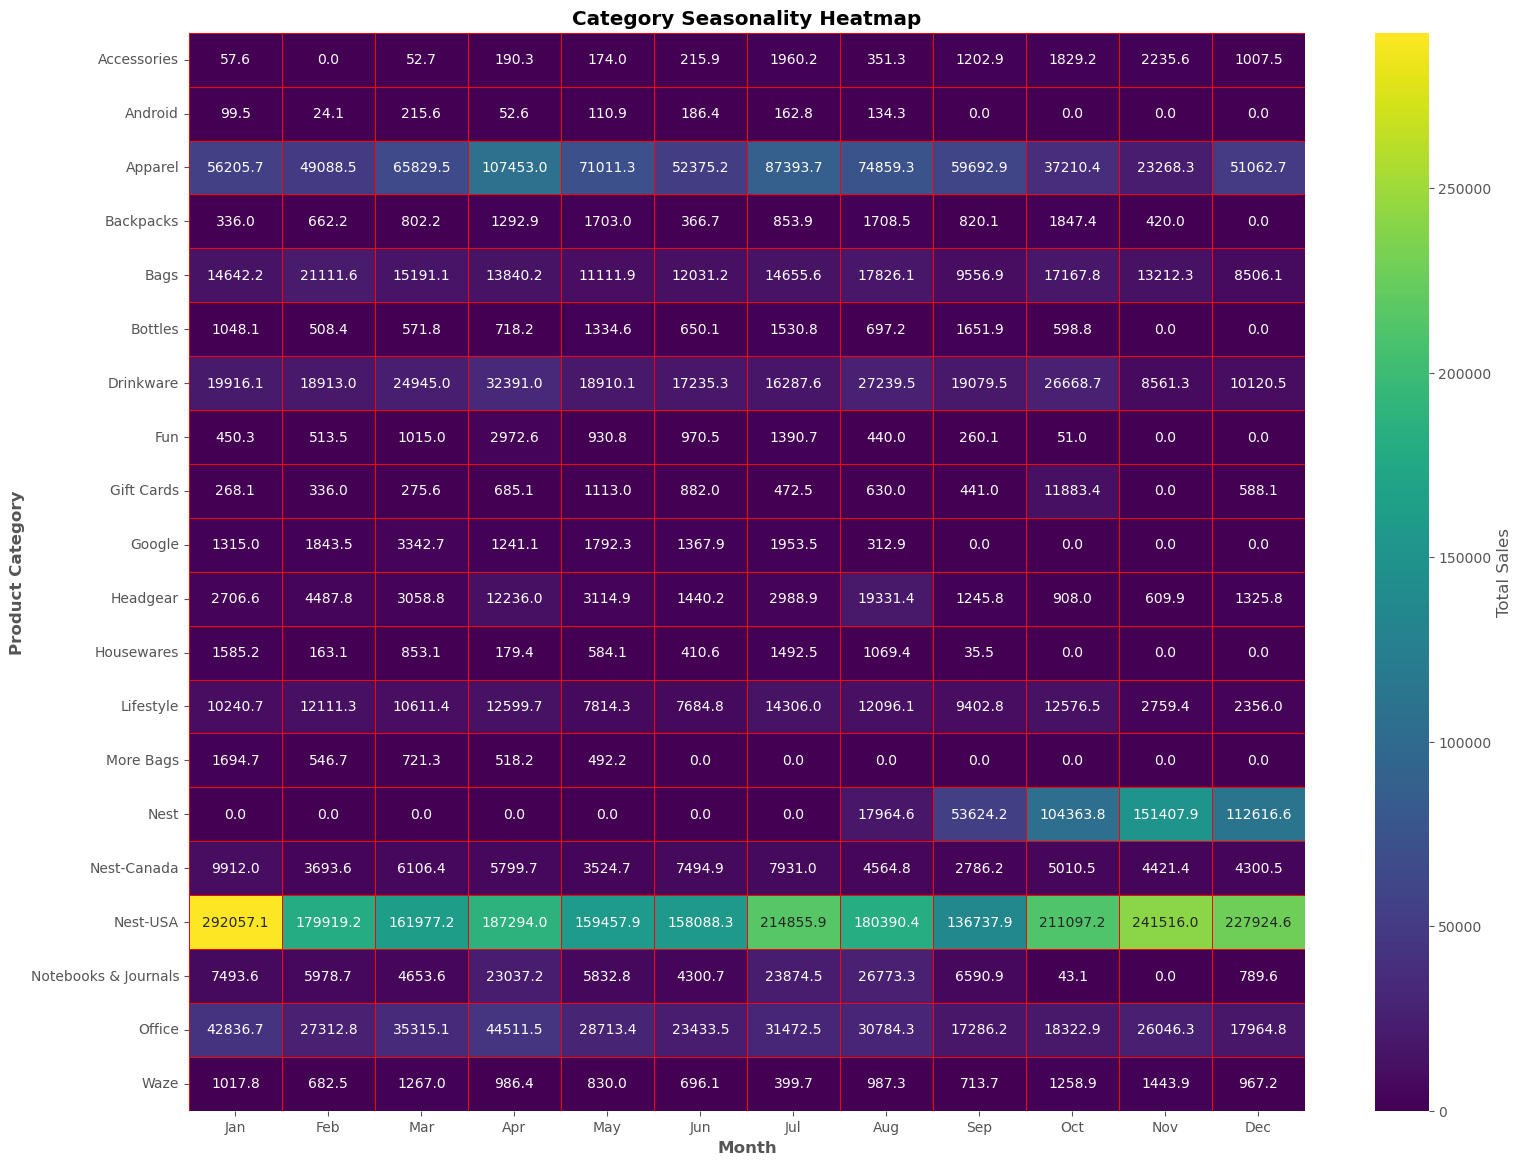

In [69]:
# Group by category and month to get the total sales for each category-month combination
category_month_sales = online_sales_df.groupby(['product_category', 'month'])['invoice_value'].sum().reset_index()
# Create a custom categorical data type for proper ordering
cat_dtype = pd.CategoricalDtype(categories=months_order, ordered=True)
category_month_sales['month'] = category_month_sales['month'].astype(cat_dtype)
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = category_month_sales.pivot(index='product_category', columns='month', values='invoice_value')
# Replace NaN values with 0
heatmap_data = heatmap_data.fillna(0)
# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(data=heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5,linecolor='red', cbar=True, cbar_kws={"label": "Total Sales"})
plt.title('Category Seasonality Heatmap', weight='bold')
plt.xlabel('Month',weight='bold')
plt.ylabel('Product Category',weight='bold')
plt.show()

- **Seasonality of sales by location**

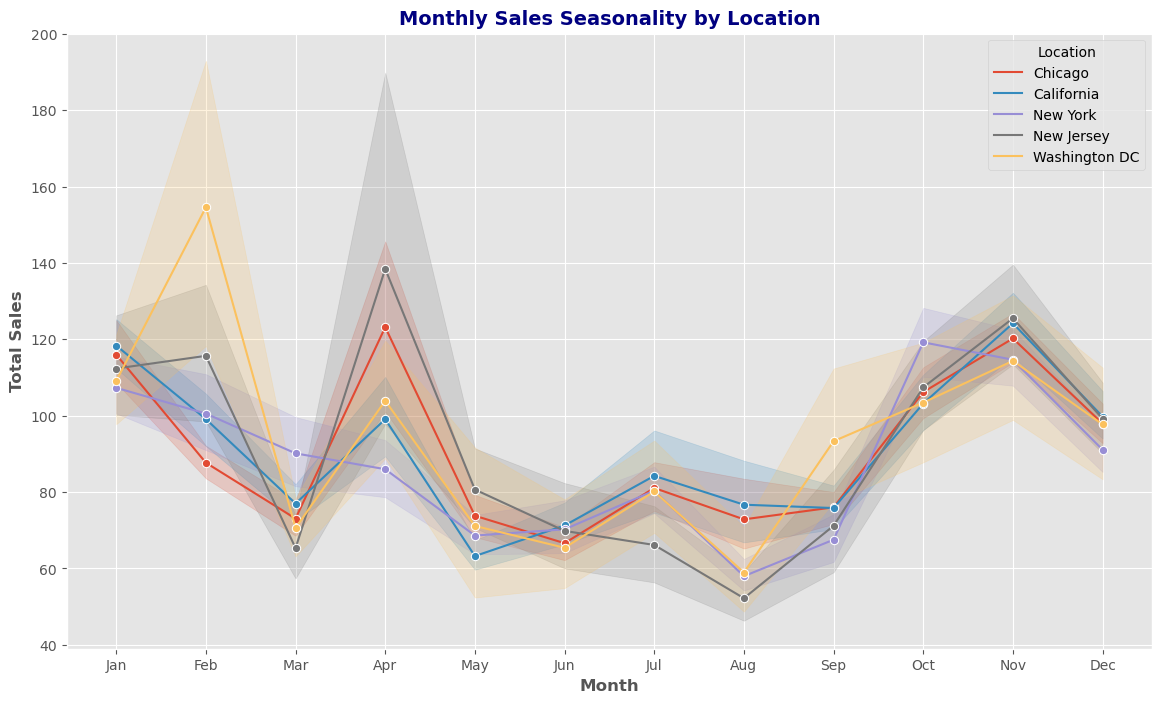

In [70]:
# Create a line plot using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='invoice_value', hue='location', data=online_sales_df, marker='o')
plt.title('Monthly Sales Seasonality by Location',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Total Sales',  weight='bold' )
plt.legend(title='Location', bbox_to_anchor=(1, 1))
plt.show()

Heatmap of seasonality by location 

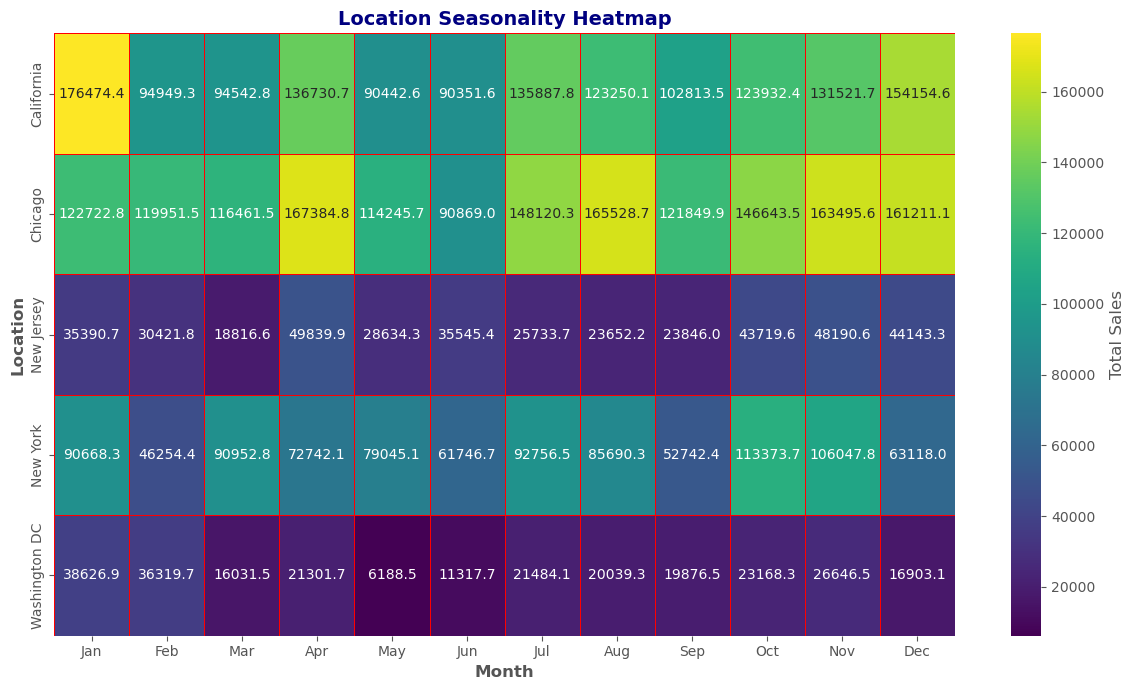

In [71]:
# Group by month and location to get the total sales for each month-location combination
location_month_sales = online_sales_df.groupby(['month', 'location'])['invoice_value'].sum().reset_index()

# Create a custom categorical data type for proper ordering
cat_dtype = pd.CategoricalDtype(categories=months_order, ordered=True)
location_month_sales['month'] = location_month_sales['month'].astype(cat_dtype)

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data_location = location_month_sales.pivot(index='location', columns='month', values='invoice_value')

# Replace NaN values with 0
heatmap_data_location = heatmap_data_location.fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data=heatmap_data_location, 
            cmap='viridis', annot=True, 
            fmt=".1f", linewidths=.5, 
            linecolor='red',cbar=True, 
            cbar_kws={"label": "Total Sales"})
plt.title('Location Seasonality Heatmap', weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month', weight='bold')
plt.ylabel('Location', weight='bold')
plt.tight_layout()
plt.show()

- **Seasonality of sales by Gender**

In [72]:
gender_seasonality = online_sales_df.groupby(['month', 'gender'])['invoice_value'].sum().unstack(fill_value=0)
gender_seasonality.index = pd.Categorical(gender_seasonality.index, categories=months_order, ordered=True)
# sorting month in correct order
gender_seasonality.sort_index(inplace=True)
gender_seasonality.rename_axis('month', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nSeasonality of sales by Gender:")
gender_seasonality.style.background_gradient(cmap=cm)


Seasonality of sales by Gender:


gender,F,M
month,,
Jan,225197.308340,238685.748710
Feb,230701.551480,97195.008720
Mar,215851.423980,120953.779850
Apr,317288.136550,130711.058680
May,205829.568120,112726.732440
Jun,183230.212760,106600.116550
Jul,276956.999230,147025.344380
Aug,243273.434200,174887.132840
Sep,163039.001530,158089.354850


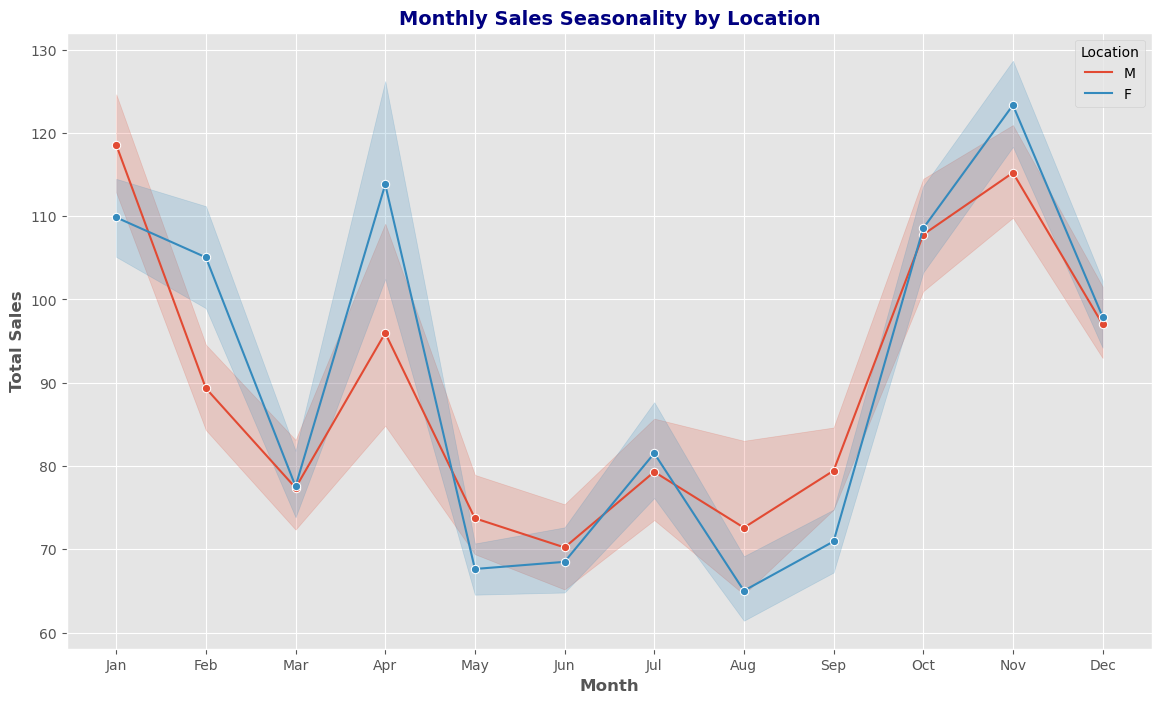

In [73]:
# Create a line plot using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='invoice_value', hue='gender', data=online_sales_df, marker='o')
plt.title('Monthly Sales Seasonality by Location',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Total Sales',  weight='bold' )
plt.legend(title='Location', bbox_to_anchor=(1, 1))
plt.show()

___________________

- **How number order varies and sales with different days?**

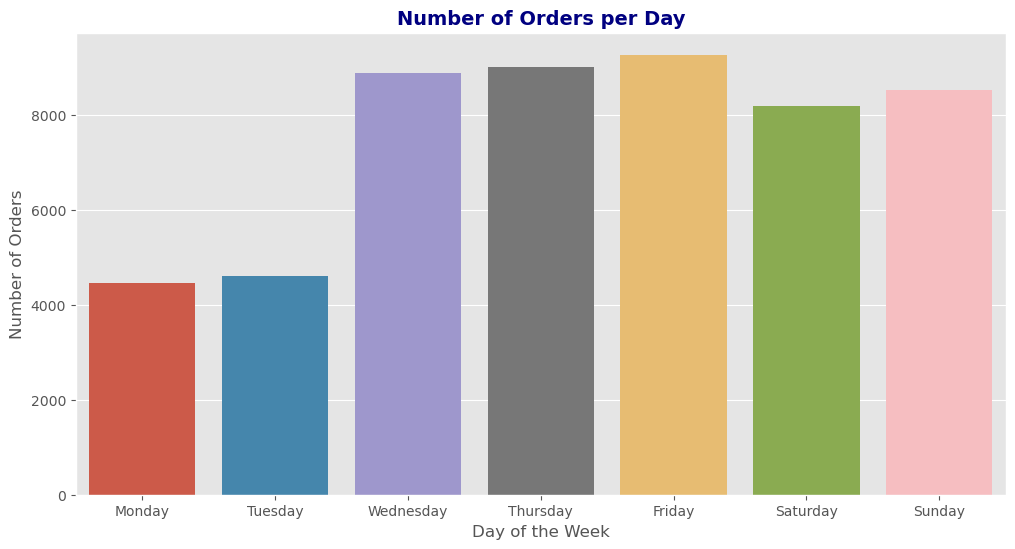

In [74]:
# Extract day of the week and month for better analysis
online_sales_df['day_of_week'] = online_sales_df['transaction_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plot the number of orders per day
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=online_sales_df, order=day_order)
plt.title('Number of Orders per Day', weight='bold', color='#000080', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


Sales on different days 

In [75]:
# group by day
revenue_by_day = online_sales_df.groupby('day_of_week')['invoice_value'].sum().reset_index()
# Create a new column 'day_of_week' with ordered days
revenue_by_day['day_of_week'] = pd.Categorical(revenue_by_day['day_of_week'], categories=day_order, ordered=True)
revenue_by_day.sort_values('day_of_week', inplace=True)
# Visualizing the DataFrame with set precision and background gradient
print("\nRevenue generated by day of the week:")
revenue_by_day.style.background_gradient(cmap=cm)


Revenue generated by day of the week:


,day_of_week,invoice_value
1,Monday,356667.463300
5,Tuesday,393222.750630
6,Wednesday,836607.544020
4,Thursday,855069.378650
0,Friday,872214.300680
2,Saturday,692889.264710
3,Sunday,707840.857280


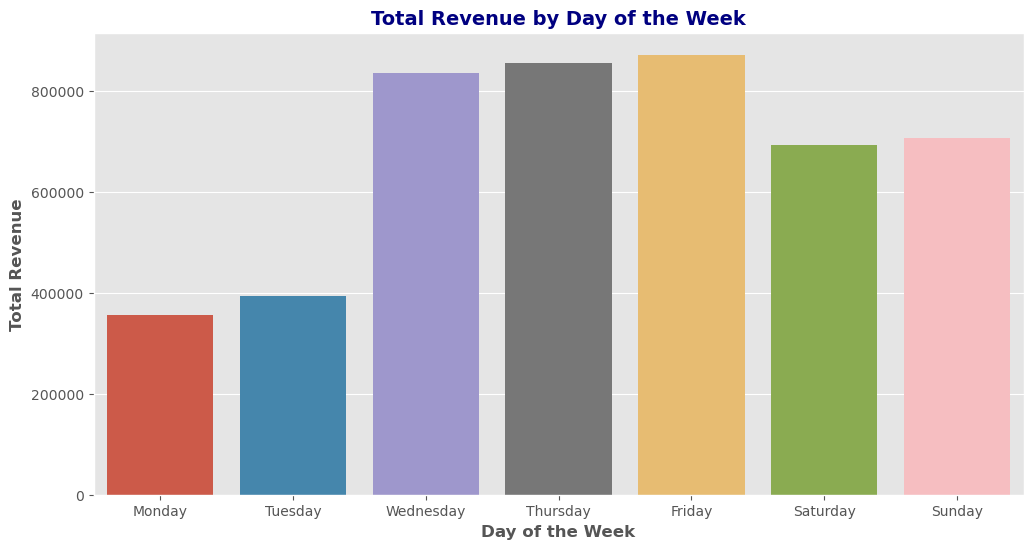

In [76]:
# Create a bar plot for revenue by day
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='invoice_value', data=revenue_by_day)
plt.title('Total Revenue by Day of the Week',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Day of the Week', weight='bold')
plt.ylabel('Total Revenue', weight='bold')
plt.show()

_______________________________________

- **Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month**

In [77]:
# filter relevant data for analysis
sales_data = online_sales_df[['month','product_category', 'quantity', 'avg_price', 'delivery_charges', 'discount_pct', 'gst', 'invoice_value']]

In [78]:
# calculate tax per order 
sales_data['tax_amount'] = sales_data['avg_price'] * sales_data['quantity'] * (1 - sales_data['discount_pct']) * sales_data['gst']
sales_data.head()

,month,product_category,quantity,avg_price,delivery_charges,discount_pct,gst,invoice_value,tax_amount
0,Jan,Nest-USA,1,153.71,6.50,0.10,0.10,158.67,13.83
1,Jan,Nest-USA,1,153.71,6.50,0.10,0.10,158.67,13.83
2,Jan,Office,1,2.05,6.50,0.10,0.10,8.53,0.18
3,Jan,Apparel,5,17.53,6.50,0.10,0.18,99.58,14.20
4,Jan,Bags,1,16.50,6.50,0.10,0.18,24.02,2.67


In [79]:
# marketing dataframe
# all the columns in lower case for convinience 
marketing_df.columns = marketing_df.columns.str.lower()
# to date time format
marketing_df['date'] = pd.to_datetime(marketing_df['date'])
# create month column 
marketing_df['month'] = marketing_df['date'].dt.strftime('%b')
# total marketing spend 
marketing_df['marketing_spend'] = marketing_df['offline_spend'] + marketing_df['online_spend']
# group marketing spend by month 
monthly_marketing_spend = marketing_df.groupby('month')['marketing_spend'].sum().reset_index()
# Create a custom categorical data type for proper ordering
cat_dtype = pd.CategoricalDtype(categories=months_order, ordered=True)
monthly_marketing_spend['month'] = monthly_marketing_spend['month'].astype(cat_dtype)
monthly_marketing_spend.sort_values('month', inplace=True)
# show the result
monthly_marketing_spend


,month,marketing_spend
4,Jan,154928.95
3,Feb,137107.92
7,Mar,122250.09
0,Apr,157026.83
8,May,118259.64
6,Jun,134318.14
5,Jul,120217.85
1,Aug,142904.15
11,Sep,135514.54
10,Oct,151224.65


In [80]:
# Group by month and calculate revenue, marketing spend, tax, and delivery charges
monthly_summery = sales_data.groupby('month').agg(
    revenue=('invoice_value', 'sum'),
    tax = ('tax_amount', 'sum'),
    delivery_charges = ('delivery_charges', 'sum')
).reset_index()
# calculate percentage of delivery charges 
monthly_summery['percentage_delivery_charges'] = (monthly_summery['delivery_charges'] / monthly_summery['revenue']) * 100
# Create a custom categorical data type for proper ordering
cat_dtype = pd.CategoricalDtype(categories=months_order, ordered=True)
monthly_summery['month'] = monthly_summery['month'].astype(cat_dtype)
# sort months column
monthly_summery.sort_values('month', inplace=True)

In [81]:
# add marketing spend to monthly summery dataframe 
monthly_summery['marketing_spend'] = monthly_marketing_spend['marketing_spend']
monthly_summery['perc_marketing_by_revenue'] =(monthly_summery['marketing_spend'] / monthly_summery['revenue']) * 100
# result monthly summery 
monthly_summery.reset_index(drop=True, inplace=True)
print(('\nMonthly Summery:'))
monthly_summery.style.background_gradient(cmap=cm)


Monthly Summery:


,month,revenue,tax,delivery_charges,percentage_delivery_charges,marketing_spend,perc_marketing_by_revenue
0,Jan,463883.057050,41121.640050,59242.320000,12.770960,154928.950000,33.398277
1,Feb,327896.560200,29524.890200,49216.600000,15.009795,137107.920000,41.814382
2,Mar,336805.203830,30103.192830,60799.940000,18.051960,122250.090000,36.296972
3,Apr,447999.195230,44583.452230,41481.740000,9.259334,157026.830000,35.050695
4,May,318556.300560,30188.066560,41396.170000,12.994931,118259.640000,37.123623
5,Jun,289830.329310,26959.894310,37513.580000,12.943290,134318.140000,46.343714
6,Jul,423982.343610,39571.702610,48723.930000,11.491971,120217.850000,28.354447
7,Aug,418160.567040,35739.833040,61099.570000,14.611509,142904.150000,34.174468
8,Sep,321128.356380,27513.708380,41005.420000,12.769168,135514.540000,42.199494
9,Oct,450837.462550,36002.289550,45961.880000,10.194778,151224.650000,33.543053


visualise the result 

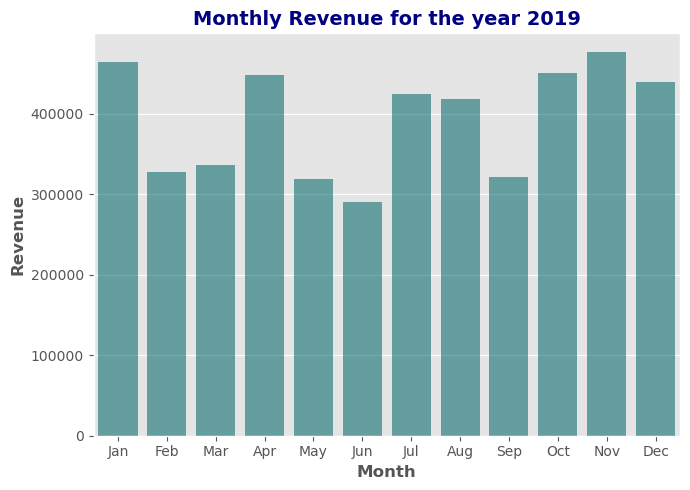

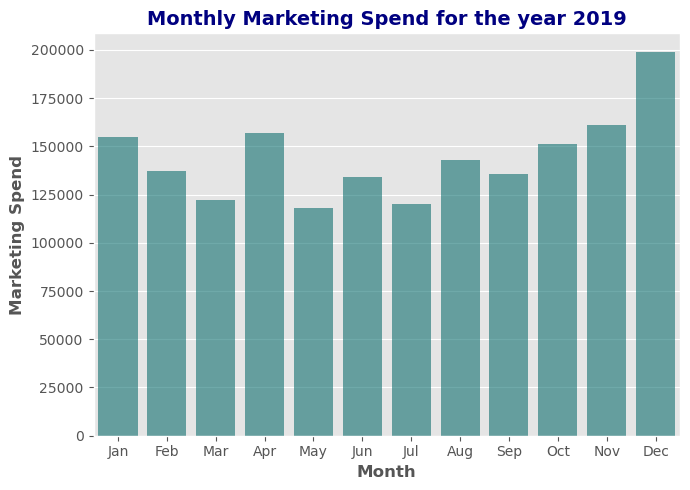

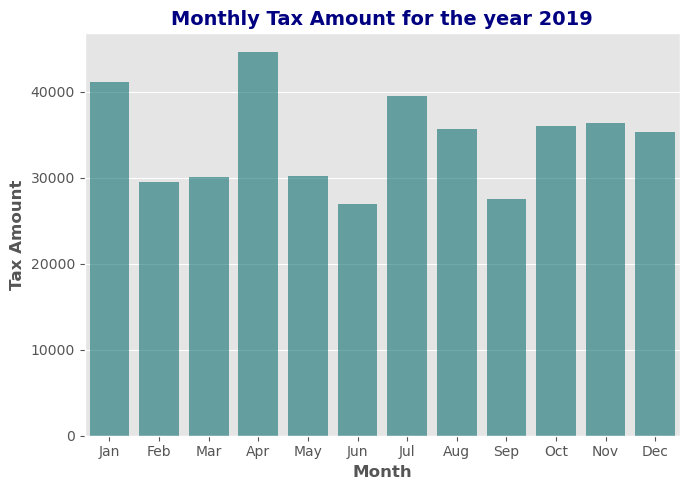

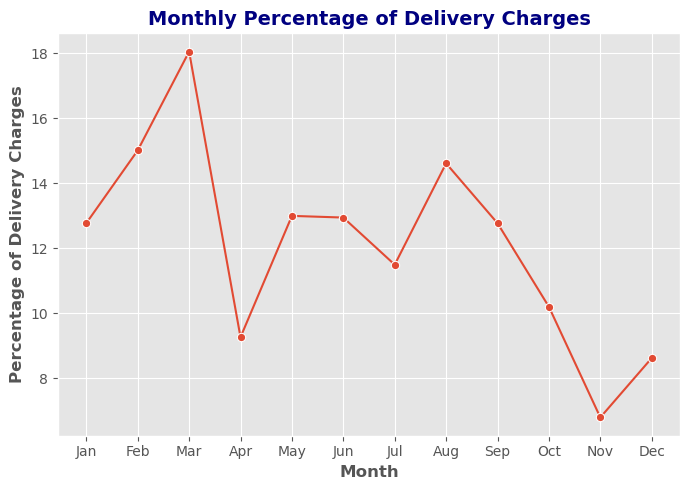

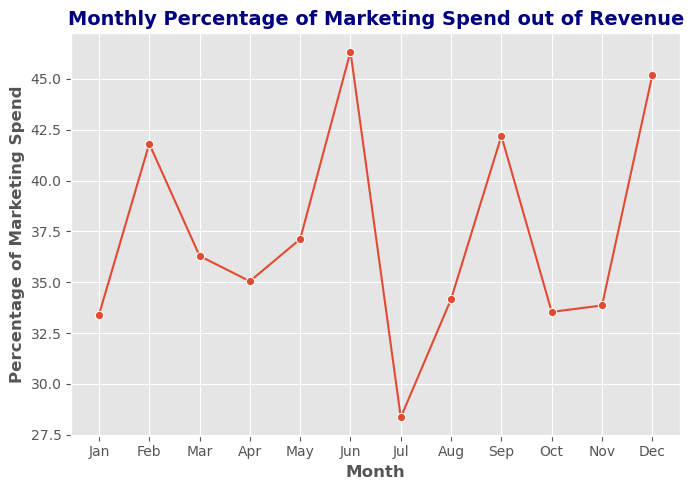

In [82]:
# plotting revenue
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='revenue',  data=monthly_summery, color='#008080', alpha=0.6)
plt.title('Monthly Revenue for the year 2019',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Revenue',  weight='bold')
plt.tight_layout()
plt.show()

# plotting marketing spend 
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='marketing_spend',  data=monthly_summery, color='#008080', alpha=0.6)
plt.title('Monthly Marketing Spend for the year 2019',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Marketing Spend',  weight='bold')
plt.tight_layout()
plt.show()

# plotting  Tax amount 
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='tax',  data=monthly_summery, color='#008080', alpha=0.6)
plt.title('Monthly Tax Amount for the year 2019',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Tax Amount',  weight='bold')
plt.tight_layout()
plt.show()

# plotting percentage of delivery charges
plt.figure(figsize=(7, 5))
sns.lineplot(x='month', y='percentage_delivery_charges', data=monthly_summery, marker='o')
plt.title('Monthly Percentage of Delivery Charges',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Percentage of Delivery Charges',  weight='bold' )
plt.tight_layout()
plt.show()

# plotting percentage of marketing spend out of revenue
plt.figure(figsize=(7, 5))
sns.lineplot(x='month', y='perc_marketing_by_revenue', data=monthly_summery, marker='o')
plt.title('Monthly Percentage of Marketing Spend out of Revenue',  weight='bold', color='#000080', fontsize=14)
plt.xlabel('Month',  weight='bold')
plt.ylabel('Percentage of Marketing Spend',  weight='bold' )
plt.tight_layout()
plt.show()

__________________

- **How marketing spend is impacting on revenue?**

To analyze how marketing spend is impacting revenue, We create a scatter plot to visualize the relationship between marketing spend and revenue. Additionally, we calculate correlation coefficients to quantify the strength and direction of the relationship.

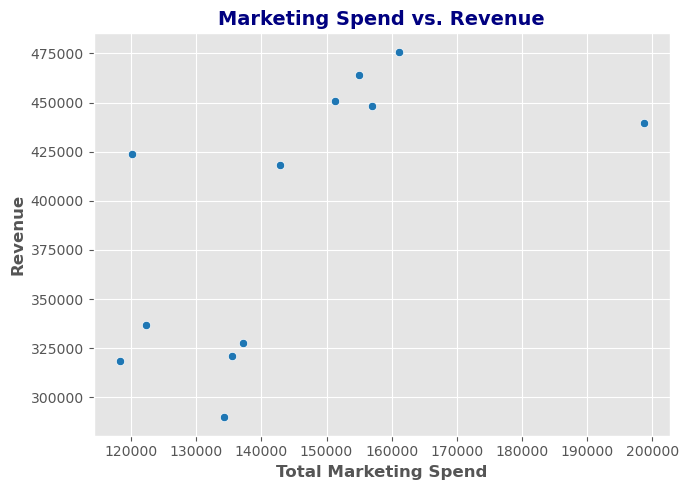

In [83]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x='marketing_spend', y='revenue', data=monthly_summery, color='#1f77b4')
plt.title('Marketing Spend vs. Revenue', weight='bold', color='#000080', fontsize=14)
plt.xlabel('Total Marketing Spend', weight='bold')
plt.ylabel('Revenue', weight='bold')
plt.tight_layout()
plt.show()

In [122]:
# Calculate correlation coefficient
correlation_coefficient = monthly_summery['marketing_spend'].corr(monthly_summery['revenue'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.0825541711080797


The positive correlation coefficient value indicates a weak positive linear relationship. However, the closeness to zero suggests that the relationship is not strong.
In practical terms, it implies that there is a slight tendency for an increase in `Marketing Spend` to be associated with a slight increase in `Revenue`, but the relationship is not substantial. Other factors likely contribute more significantly to variations in revenue.

___________________________

- **Which product was appeared most frequently in the transactions?**

In [110]:
# most frequently appeared product 
most_appeared_product = online_sales_df['product_sku'].value_counts().idxmax()
number_of_transaction = online_sales_df['product_sku'].value_counts().max()
product_descr = online_sales_df.loc[online_sales_df['product_sku'] == most_appeared_product, 'product_description'].iloc[0]
product_cat = online_sales_df.loc[online_sales_df['product_sku'] == most_appeared_product, 'product_category'].iloc[0]

# display the result 
print(f"The product that appeared most frequently is: {most_appeared_product}")
print(f"The product description : {product_descr}")
print(f"Product category of the most frequently appearing product is: {product_cat}")
print(f"Total number of transactions of the product : {number_of_transaction} ")



The product that appeared most frequently is: GGOENEBJ079499
The product description : Nest Learning Thermostat 3rd Gen-USA - Stainless Steel
Product category of the most frequently appearing product is: Nest-USA
Total number of transactions of the product : 3511 


_____________________

- **Which product was purchased mostly based on the quantity?**

In [111]:
# group by product and add the quantity 
product_by_qty = online_sales_df.groupby('product_sku')['quantity'].sum()

# most purhased product and the qty purcchased
most_purchased_product = product_by_qty.idxmax()
qty_purchased = product_by_qty.max()

# product description and  category of most  purchased product
product_cat = online_sales_df.loc[online_sales_df['product_sku']==most_purchased_product, 'product_category'].iloc[0]
product_descr = online_sales_df.loc[online_sales_df['product_sku'] == most_purchased_product, 'product_description'].iloc[0]
# display the result 
print(f"The product that was purchased the most based on quantity is: {most_purchased_product}")
print(f"The product description : {product_descr}")
print(f"Product category of the most purchased product is: {product_cat}")
print(f"Quantity purchased: {qty_purchased}")


The product that was purchased the most based on quantity is: GGOEGGOA017399
The product description : Maze Pen
Product category of the most purchased product is: Office
Quantity purchased: 16234


______________________________________________________